In [12]:
import pandas as pd
import matplotlib.pyplot as plt

cyberdf = pd.read_csv('../Data_Sources/Cyberpunk_2077_Steam_Reviews.csv')
cyberKeep = ['ReviewID', 'Rating', 'Hours Played', 'Received for Free', 'Update']
cyberdf = cyberdf[cyberKeep]

cyberdf['Hours Played'] = pd.to_numeric(cyberdf['Hours Played'], errors='coerce')
cyberdf = cyberdf.dropna(subset=['Hours Played'])
cyberdf['Hours Played'] = cyberdf['Hours Played'].astype(int)
cyberdf = cyberdf[cyberdf['Hours Played'] <= 1100]

cyberdf.head()

,ReviewID,Rating,Hours Played,Received for Free,Update
0,81918897,Recommended,401,False,Release
1,81918903,Recommended,247,True,Release
3,81918912,Recommended,8,False,Release
4,81918918,Not Recommended,86,True,Release
5,81918923,Recommended,27,True,Release


In [5]:
print(cyberdf[cyberdf['Hours Played'] == 50])

         ReviewID           Rating  Hours Played  Received for Free  \
272      81920377      Recommended            50               True   
662      81921590      Recommended            50               True   
928      81922320      Recommended            50              False   
936      81922344  Not Recommended            50              False   
1016     81922546      Recommended            50              False   
...           ...              ...           ...                ...   
759812  172459195      Recommended            50              False   
759977  172488531      Recommended            50              False   
760241  172681288      Recommended            50              False   
760246  172686144      Recommended            50              False   
760269  172706425      Recommended            50              False   

            Update  
272        Release  
662        Release  
928        Release  
936        Release  
1016       Release  
...            ...  


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def calculate_recommendation_percentage_for_intervals(df, intervals):
    percentage_dict = {}
    
    for hours_played in intervals:
        filtered_data = cyberdf[cyberdf['Hours Played'] == hours_played]
        total_reviews = len(filtered_data)
        recommended_reviews = len(filtered_data[filtered_data['Rating'] == 'Recommended'])
        if total_reviews > 0:
            recommendation_percentage = (recommended_reviews / total_reviews) * 100
        else:
            recommendation_percentage = 0
        percentage_dict[hours_played] = recommendation_percentage
    return percentage_dict

def plotting(data):
    hours_played = list(data.keys())
    percentage = list(data.values())
    plt.figure(figsize=(10,6))
    plt.plot(hours_played, percentage,'o')
    plt.grid()
    plt.xlabel('Hours Played')
    plt.ylabel('Percentage of Positive Ratings (%)')


def calc(data):
    xy_list = []
    data_x = []
    data_y = []
    x = list(data.keys())
    y = list(data.values())
    for key, value in data.items():
        xy = key * value
        keysquared = key ** 2
        valuesquared = value ** 2
        data_x.append(keysquared)
        data_y.append(valuesquared)
        xy_list.append(xy)
    return x, y, xy_list, data_x, data_y

# def summation(x, y, xy_list, data_x, data_y):
#     sum_x = sum(x)
#     sum_y = sum(y)
#     xy_list = sum(xy_list)
#     data_x = sum(data_x)
#     data_y = sum(data_y)
#     return sum_x, sum_y, xy_list, data_x, data_y


Pearson correlation coefficient (r): 0.5321


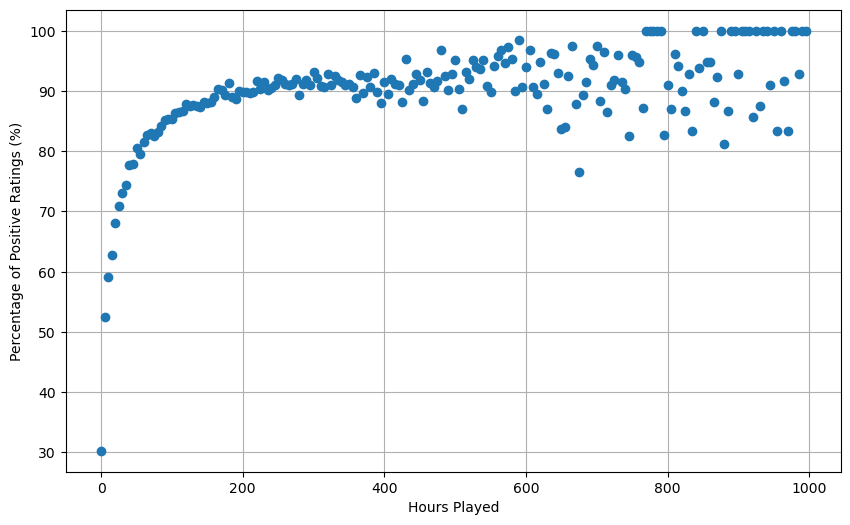

In [16]:
#EDIT ONLY STARTING FROM THIS PART
amountofdata = 200

#..TO THIS PART!


div = int(1000/amountofdata)
start = 0
end = 1000
intervals = range(start, end, div)
percentage_dict = calculate_recommendation_percentage_for_intervals(cyberdf, intervals)

#for hours_played, percentage in percentage_dict.items():
    #print(f"Percentage of recommendations at {hours_played} hours: {percentage:.2f}%")

plotting(percentage_dict)
x, y, xy, x_squared, y_squared = calc(percentage_dict)
n = len(x)
sum_x, sum_y, sum_xy, sum_x_squared, sum_y_squared = summation(x, y, xy, x_squared, y_squared)


# Compute the numerator and denominator
numerator = n * sum_xy - sum_x * sum_y
denominator = np.sqrt((n * sum_x_squared - sum_x**2) * (n * sum_y_squared - sum_y**2))
if denominator == 0:
    r = 0
else:
    r = numerator / denominator
print(f"Pearson correlation coefficient (r): {r:.4f}")
plt.show()
    